In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

In [3]:
print(tf.__version__)

2.7.0


In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [5]:
len(X_train), len(X_test)

(42000, 18000)

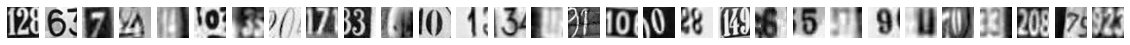

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 1))
for i in range(30):
    plt.subplot(1, 30, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [25]:
df= X_train[0]
df.reshape(64,16)

array([[33.0704, 30.2601, 26.852 , ..., 31.2322, 37.2917, 38.1776],
       [30.8902, 24.4887, 27.983 , ..., 71.4471, 58.2204, 42.9939],
       [25.2283, 25.5533, 29.9765, ..., 61.1815, 80.5278, 86.1744],
       ...,
       [26.7381, 25.7598, 21.5322, ..., 28.1094, 29.4683, 30.0661],
       [50.2984, 26.0773, 24.0389, ..., 28.6516, 29.1416, 30.2833],
       [33.5865, 33.3092, 32.3756, ..., 49.6682, 50.853 , 53.0377]],
      dtype=float32)

In [30]:
X_train.shape

(42000, 32, 32, 1)

In [31]:
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [33]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


In [34]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [35]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [40]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers


model1 = Sequential() 
model1.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", input_shape=(32, 32, 1)))
model1.add(LeakyReLU(0.1))
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
model1.add(LeakyReLU(0.1))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(32))
model1.add(LeakyReLU(0.1))
model1.add(Dense(10, activation='softmax'))

adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [3]:
model1.summary()

NameError: ignored

In [42]:
history_model_1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 56s 212ms/step - loss: 1.6910 - accuracy: 0.4300 - val_loss: 0.8973 - val_accuracy: 0.7432
Epoch 2/20
263/263 [==============================] - 56s 212ms/step - loss: 0.7251 - accuracy: 0.7944 - val_loss: 0.6266 - val_accuracy: 0.8262
Epoch 3/20
263/263 [==============================] - 55s 210ms/step - loss: 0.5724 - accuracy: 0.8367 - val_loss: 0.5607 - val_accuracy: 0.8442
Epoch 4/20
263/263 [==============================] - 55s 209ms/step - loss: 0.5075 - accuracy: 0.8552 - val_loss: 0.5281 - val_accuracy: 0.8535
Epoch 5/20
263/263 [==============================] - 56s 211ms/step - loss: 0.4661 - accuracy: 0.8673 - val_loss: 0.5114 - val_accuracy: 0.8595
Epoch 6/20
263/263 [==============================] - 56s 212ms/step - loss: 0.4331 - accuracy: 0.8751 - val_loss: 0.4995 - val_accuracy: 0.8631
Epoch 7/20
263/263 [==============================] - 56s 212ms/step - loss: 0.3991 - accuracy: 0.8847 - val_loss: 0.4867 - val_ac

In [2]:
dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

NameError: ignored